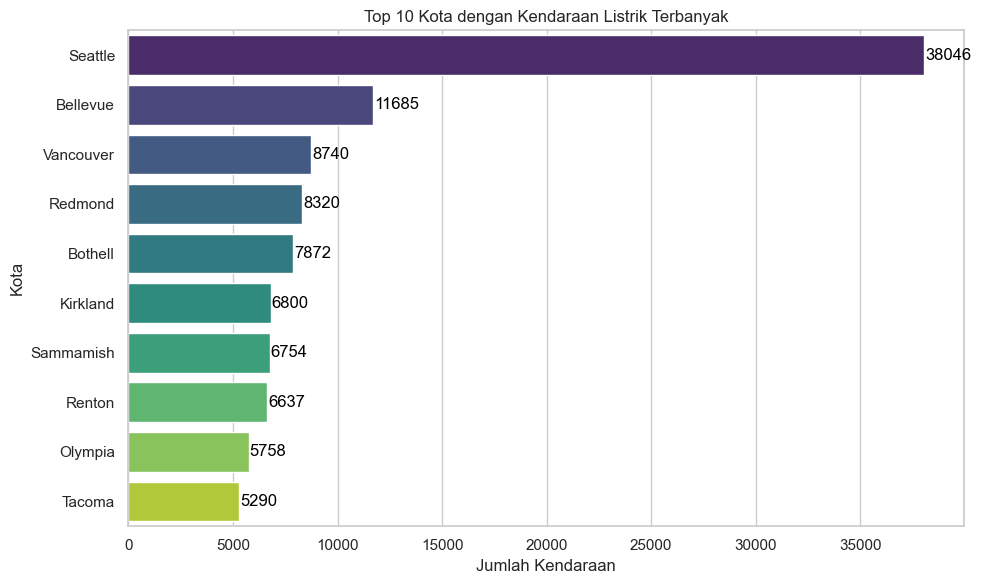

City        Bellevue  Bothell  Kirkland  Olympia  Redmond  Renton  Sammamish   
Model Year                                                                     
2000               0        0         0        1        0       0          0  \
2002               0        0         0        0        0       0          1   
2008               1        0         1        0        2       0          0   
2010               3        0         2        1        1       0          0   
2011              28       14        12       23        9       8          5   
2012              42       23        28       51       19      28         15   
2013             133       67        76      141       92      91         61   
2014             103       74        70       98       83      88         57   
2015             190      105       102      124      114      86         69   
2016             220      118       159      142      131     109        104   
2017             310      165       199 

<Figure size 1200x700 with 0 Axes>

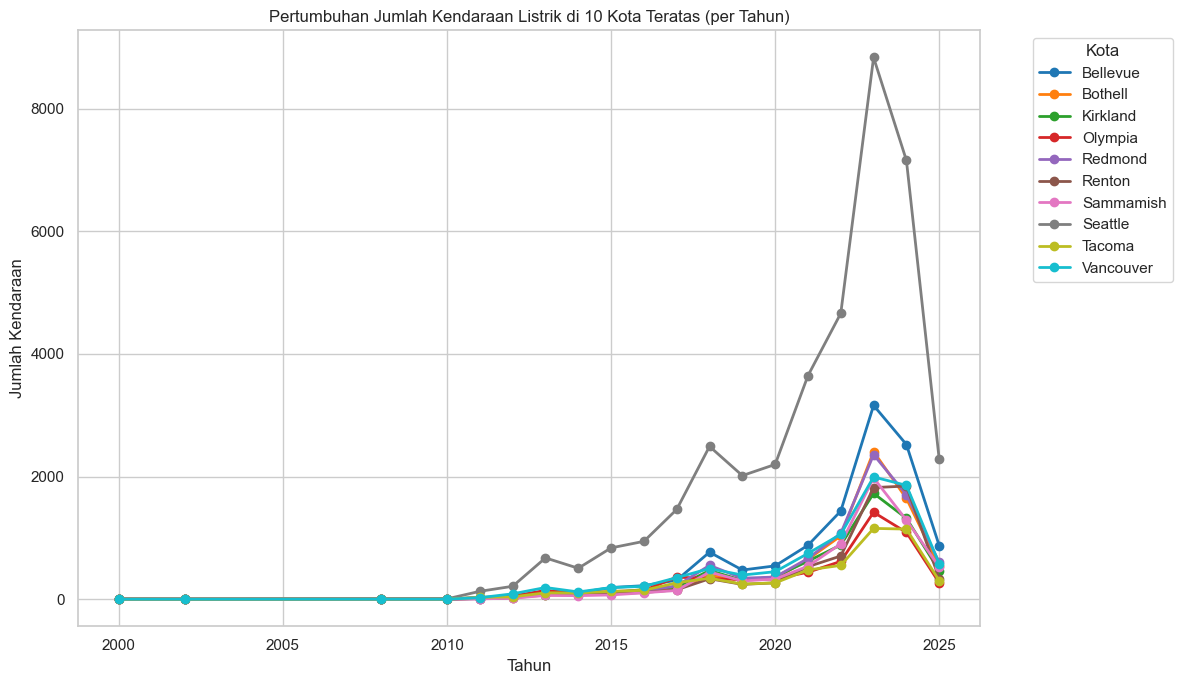

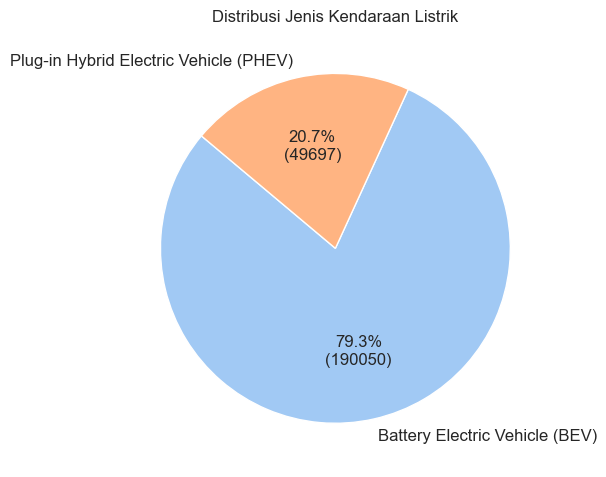

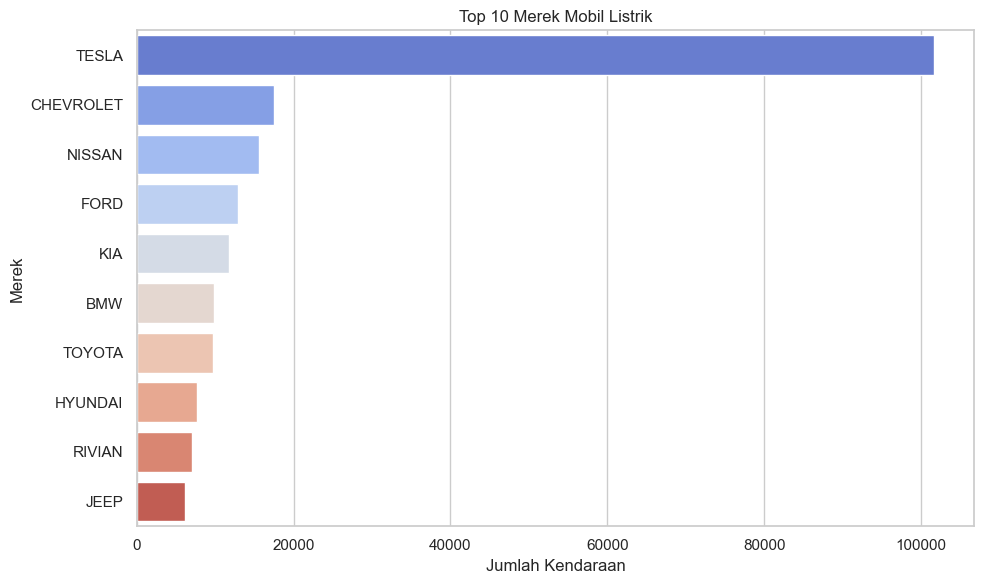

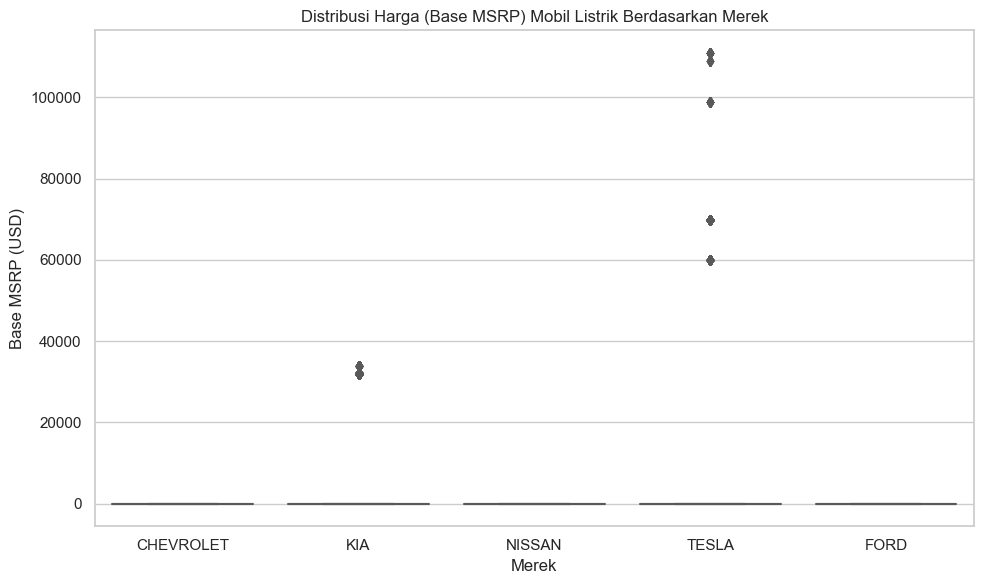

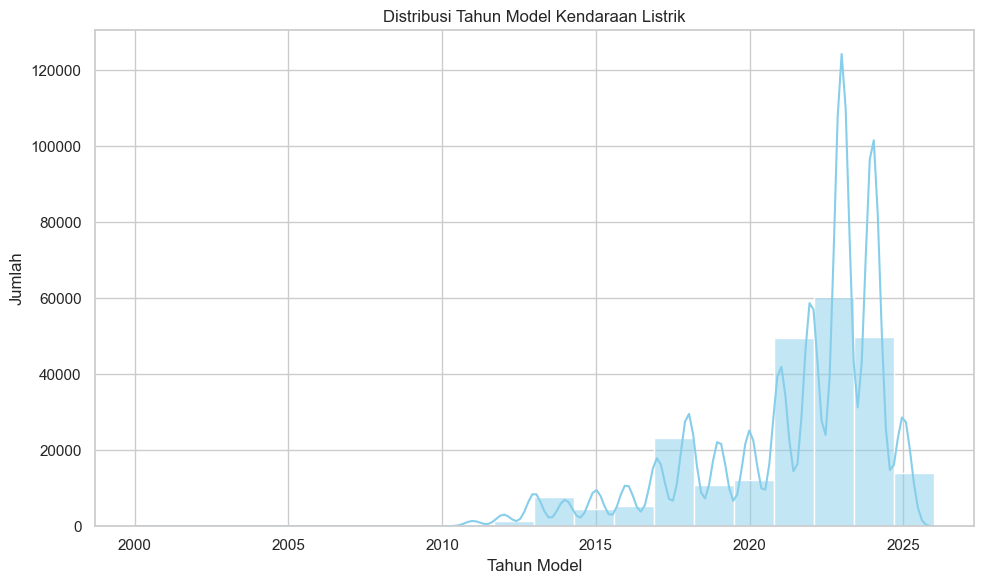

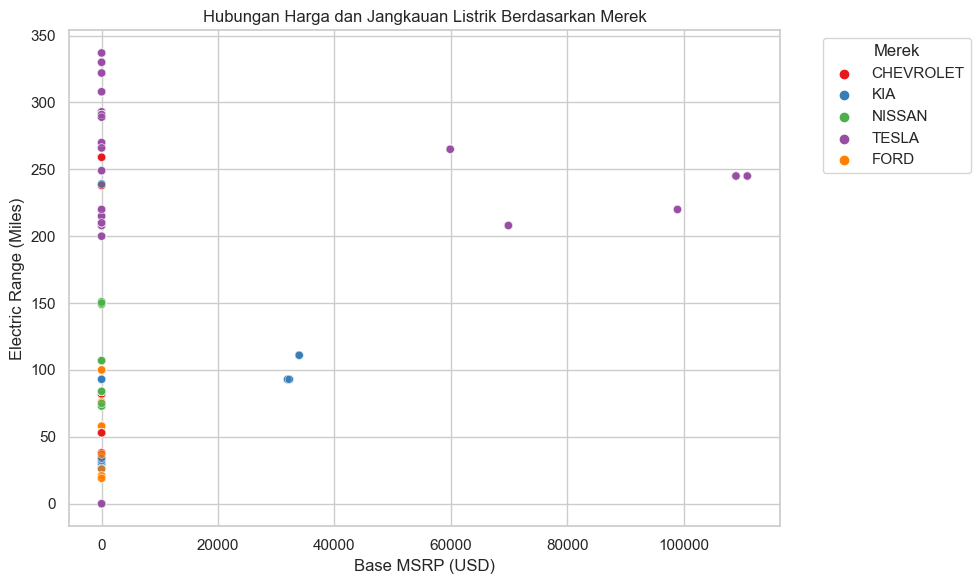

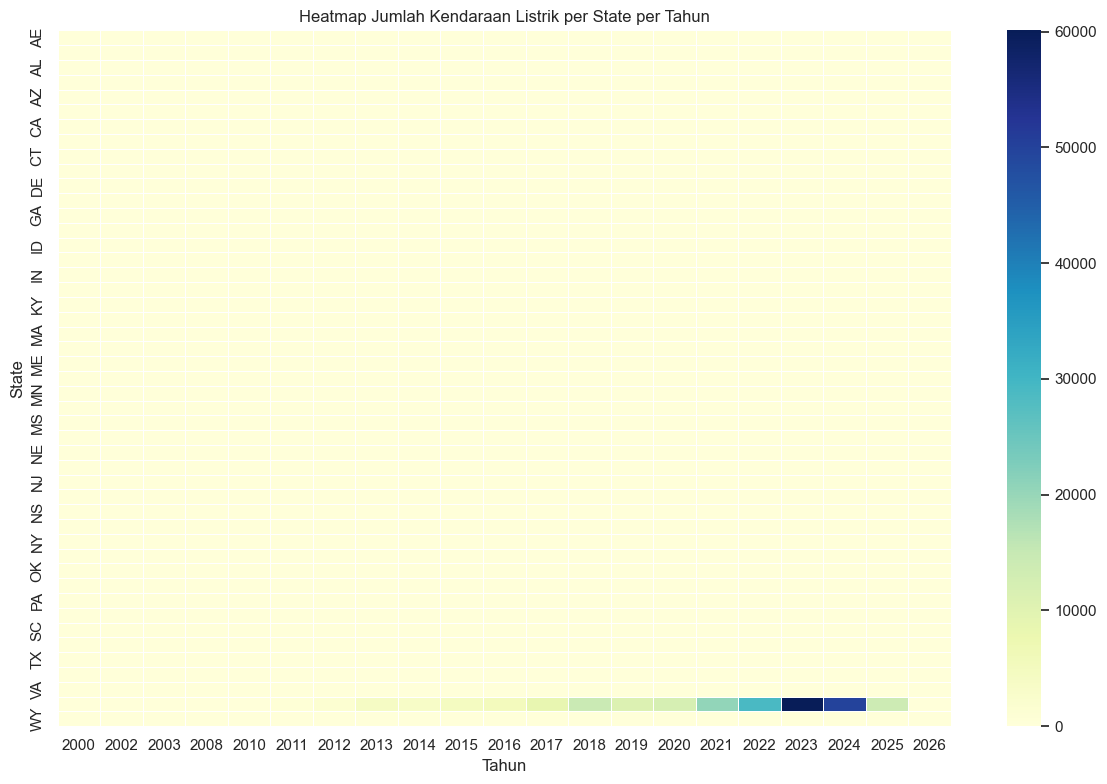

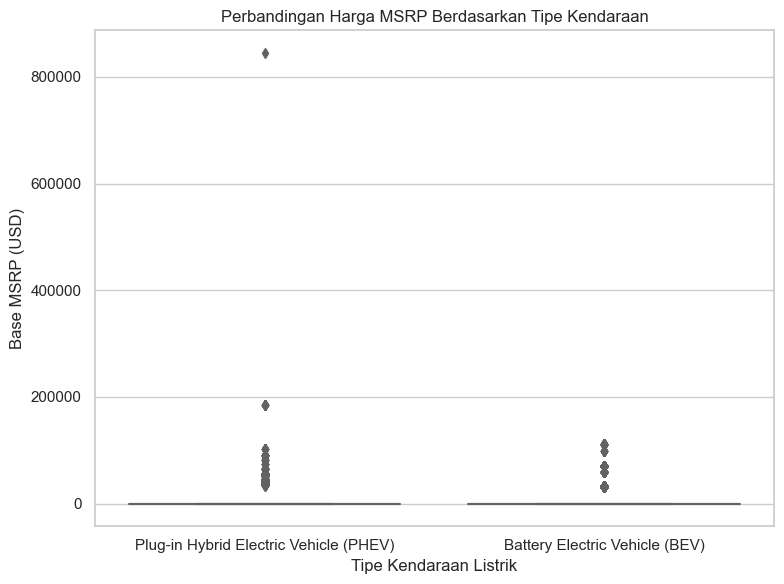

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

sns.set(style="whitegrid")

# =========================
# 1. Top 10 Kota Terbanyak
# =========================
top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title("Top 10 Kota dengan Kendaraan Listrik Terbanyak")
plt.xlabel("Jumlah Kendaraan")
plt.ylabel("Kota")

for i, v in enumerate(top_cities.values):
    plt.text(v + 50, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

# =========================
# 1. Top 10 Kota Terbanyak
# =========================
top_cities = df['City'].value_counts().head(10).index

# Filter data untuk Top 10 kota saja
filtered_df = df[df['City'].isin(top_cities)]

# Hitung jumlah kendaraan per kota per tahun
growth_data = filtered_df.groupby(['Model Year', 'City']).size().unstack(fill_value=0)

# Cek isi data sebelum diplot
print(growth_data.sort_index())  # <- Tambahkan ini agar hasil bisa dicek di terminal/jupyter output

# Plot tren pertumbuhan
plt.figure(figsize=(12, 7))
growth_data.plot(kind='line', marker='o', linewidth=2, figsize=(12, 7), cmap='tab10')

plt.title("Pertumbuhan Jumlah Kendaraan Listrik di 10 Kota Teratas (per Tahun)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kendaraan")
plt.legend(title='Kota', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================
# 2. Tipe Kendaraan Listrik
# ============================
plt.figure(figsize=(6, 6))

# Hitung value counts
ev_counts = df['Electric Vehicle Type'].value_counts()

# Fungsi untuk menampilkan jumlah + persen
def make_autopct(values):
    def autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f"{pct:.1f}%\n({count})"
    return autopct

ev_counts.plot.pie(
    autopct=make_autopct(ev_counts),
    startangle=140,
    colors=sns.color_palette('pastel'),
    textprops={'fontsize': 12}
)

plt.title("Distribusi Jenis Kendaraan Listrik")
plt.ylabel("")
plt.tight_layout()
plt.show()


# ========================
# 3. Merek Terpopuler
# ========================
top_makes = df['Make'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_makes.values, y=top_makes.index, palette='coolwarm')
plt.title("Top 10 Merek Mobil Listrik")
plt.xlabel("Jumlah Kendaraan")
plt.ylabel("Merek")
plt.tight_layout()
plt.show()

# ====================================
# 4. Distribusi Harga MSRP per Merek
# ====================================
top_5_makes = df['Make'].value_counts().head(5).index
filtered_df = df[df['Make'].isin(top_5_makes)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Make', y='Base MSRP', data=filtered_df, palette='Set2')
plt.title("Distribusi Harga (Base MSRP) Mobil Listrik Berdasarkan Merek")
plt.xlabel("Merek")
plt.ylabel("Base MSRP (USD)")
plt.tight_layout()
plt.show()

# ===============================
# 5. Histogram Tahun Produksi
# ===============================
plt.figure(figsize=(10, 6))
sns.histplot(df['Model Year'], bins=20, kde=True, color='skyblue')
plt.title("Distribusi Tahun Model Kendaraan Listrik")
plt.xlabel("Tahun Model")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

# 6
top_5_makes = df['Make'].value_counts().head(5).index
filtered = df[df['Make'].isin(top_5_makes)]


filtered = filtered.dropna(subset=['Base MSRP', 'Electric Range'])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered,
    x='Base MSRP',
    y='Electric Range',
    hue='Make',
    palette='Set1',
    alpha=0.7
)
plt.title("Hubungan Harga dan Jangkauan Listrik Berdasarkan Merek")
plt.xlabel("Base MSRP (USD)")
plt.ylabel("Electric Range (Miles)")
plt.legend(title="Merek", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 7
heatmap_data = df.pivot_table(
    index='State',
    columns='Model Year',
    values='VIN (1-10)',
    aggfunc='count'
).fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5)
plt.title("Heatmap Jumlah Kendaraan Listrik per State per Tahun")
plt.xlabel("Tahun")
plt.ylabel("State")
plt.tight_layout()
plt.show()

#8
df_type_price = df.dropna(subset=['Base MSRP', 'Electric Vehicle Type'])

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_type_price,
    x='Electric Vehicle Type',
    y='Base MSRP',
    palette='Accent'
)
plt.title("Perbandingan Harga MSRP Berdasarkan Tipe Kendaraan")
plt.xlabel("Tipe Kendaraan Listrik")
plt.ylabel("Base MSRP (USD)")
plt.tight_layout()
plt.show()
